# Generate High-Res 2D Classes

This example covers how to generate full-resolution 2D Class images for publication. The results will be saved as PNG and PDF format.

First initialize the `CryoSPARC` client.

In [6]:
from cryosparc.tools import CryoSPARC

cs = CryoSPARC(host="cryoem5", port=61000)
assert cs.test_connection()

Connection succeeded to cryoSPARC command_core at http://cryoem5:61002
Connection succeeded to cryoSPARC command_vis at http://cryoem5:61003


Load the templates output from the Select 2D job with the final selected templates. 

In [7]:
project = cs.find_project("P70")
job = project.find_job("J73")
templates_selected = job.load_output("templates_selected")

This job has 10 selected templates. Each template is stored in a MRC file created by the 2D Classification job. The `templates_selected` contains the location of these. Load all the unique paths (organized by path in a Python dictionary).


In [8]:
unique_mrc_paths = set(templates_selected["blob/path"])
all_templates_blobs = {path: project.download_mrc(path)[1] for path in unique_mrc_paths}

Use matplotlib to create a 5x2 grid to display these templates. Load the MRC template image data for each template. Particles for this dataset were extracted at a box size of 386px. Use a DPI slightly higher than this to allow for margins.

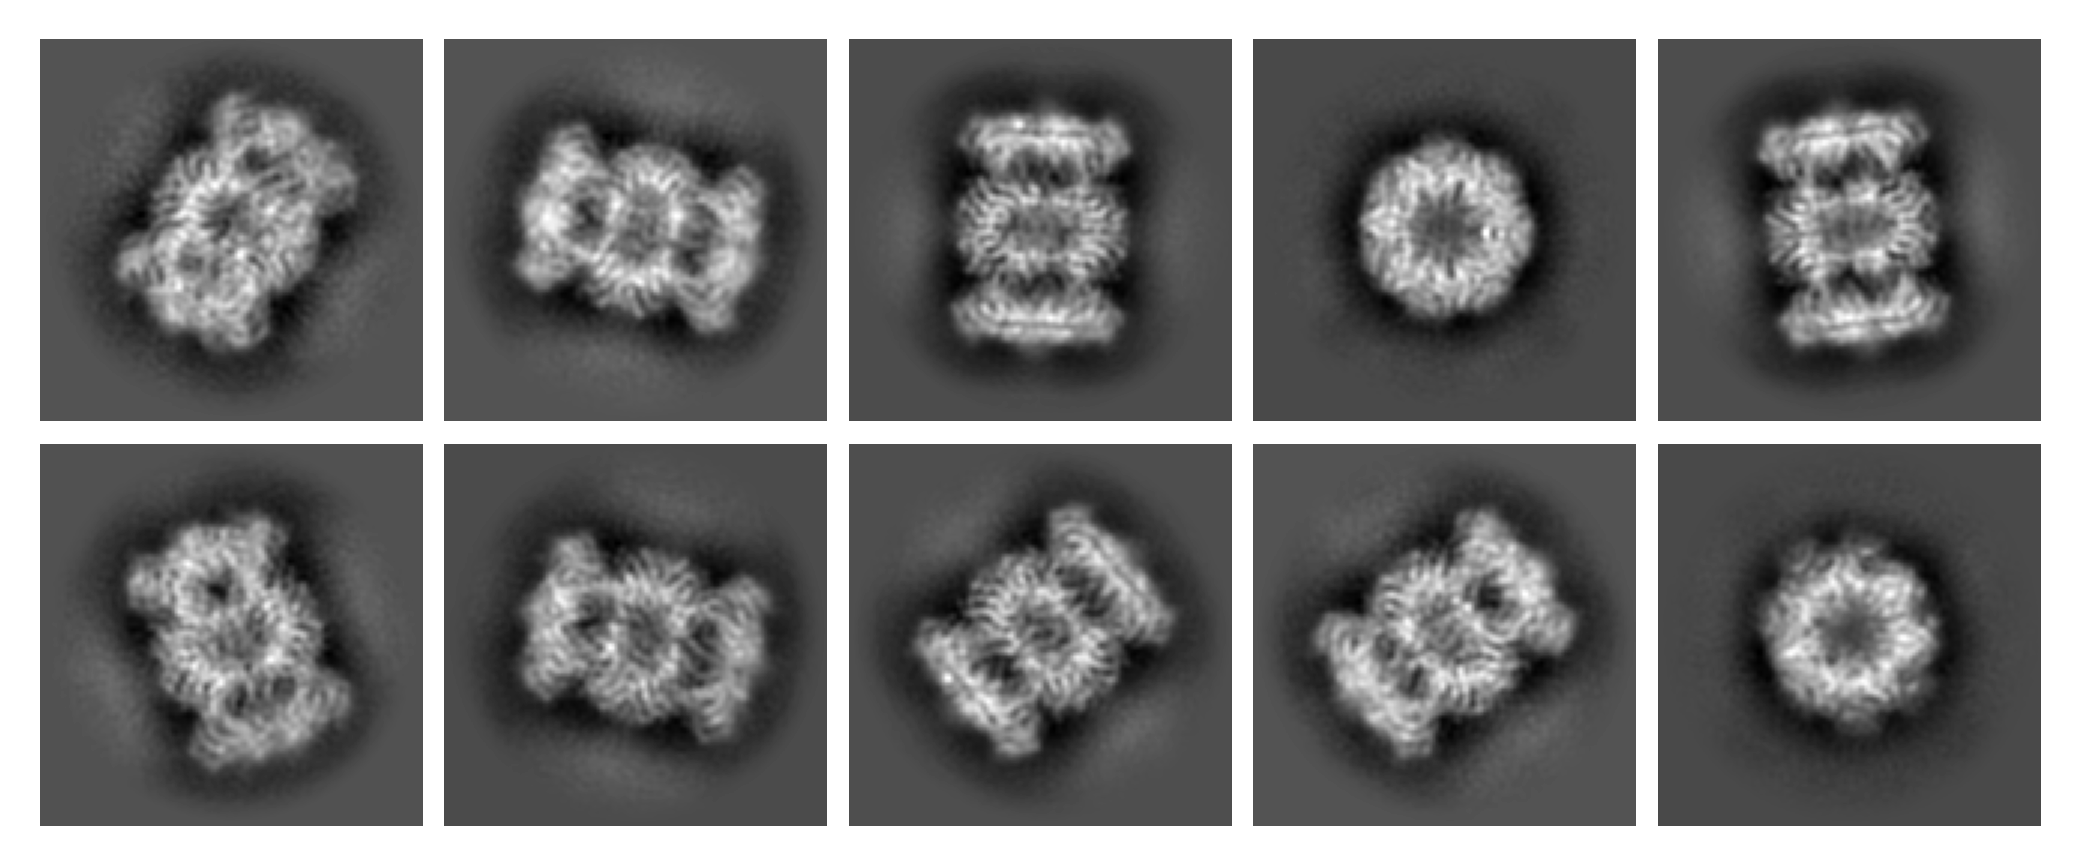

In [9]:
%matplotlib inline

from pathlib import Path
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5, 2), dpi=400)
plt.margins(x=0, y=0)

for i, template in enumerate(templates_selected.rows()):
    path = template["blob/path"]
    index = template["blob/idx"]
    blob = all_templates_blobs[path][index]
    plt.subplot(2, 5, i + 1)
    plt.axis("off")
    plt.imshow(blob, cmap="gray", origin="lower")

fig.tight_layout(pad=0, h_pad=0.4, w_pad=0.4)
fig.savefig(Path.home() / "class2d.png", bbox_inches="tight", pad_inches=0)
fig.savefig(Path.home() / "class2d.pdf", bbox_inches="tight", pad_inches=0)

In [13]:
job.log_plot(
    fig, text="2D Classes", raw_data="Hello,Templates", raw_data_file=Path.home() / "topaz.sh", raw_data_format="txt"
)

'630d25bc54cd43f7a17a6ee4'